# Wrfcf Average Tmax Over California and Nevada

In [1]:
# imports
import numpy
import Nio
import Ngl
from IPython import display
import netCDF4 as nc
from datetime import date
from datetime import timedelta
import xarray as xr
import xesmf as xe

In [2]:
# reading in wrfcf tmaxes
wrf_06 = xr.open_dataset('./wrf_6_bestbias.nc')
wrf_07 = xr.open_dataset('./wrf_7_bestbias.nc')
wrf_08 = xr.open_dataset('./wrf_8_bestbias.nc')
wrf_09 = xr.open_dataset('./wrf_9_bestbias.nc')
wrf_10 = xr.open_dataset('./wrf_10_bestbias.nc')
wrf_11 = xr.open_dataset('./wrf_11_bestbias.nc')
wrf_12 = xr.open_dataset('./wrf_12_bestbias.nc')
wrf_13 = xr.open_dataset('./wrf_13_bestbias.nc')
wrf_14 = xr.open_dataset('./wrf_14_bestbias.nc')
wrf_15 = xr.open_dataset('./wrf_15_bestbias.nc')
#wrf_16 = xr.open_dataset('./wrf_16.nc')
#wrf_17 = xr.open_dataset('./wrf_17.nc')
#wrf_17['maxes'] = wrf_17['T_2m']

#wrf_lst = [wrf_05, wrf_06, wrf_07, wrf_08, wrf_09, wrf_10, wrf_11, wrf_12, wrf_13, wrf_14, wrf_15, wrf_16, wrf_17]
wrf_lst = [wrf_06, wrf_07, wrf_08, wrf_09, wrf_10, wrf_11, wrf_12, wrf_13, wrf_14, wrf_15]

# reading in wrfcf tmaxes
#wrf_05 = xr.open_dataset('./wrf_05.nc')
wrf_06 = xr.open_dataset('./wrf_06_prev-Copy1.nc')
wrf_07 = xr.open_dataset('./wrf_07_prev-Copy1.nc')
wrf_08 = xr.open_dataset('./wrf_08_prev-Copy1.nc')
wrf_09 = xr.open_dataset('./wrf_09_prev-Copy1.nc')
wrf_10 = xr.open_dataset('./wrf_10_prev-Copy1.nc')
wrf_11 = xr.open_dataset('./wrf_11_prev-Copy1.nc')
wrf_12 = xr.open_dataset('./wrf_12_prev-Copy1.nc')
wrf_13 = xr.open_dataset('./wrf_13_prev-Copy1.nc')
wrf_14 = xr.open_dataset('./wrf_14_prev-Copy1.nc')
wrf_15 = xr.open_dataset('./wrf_15_prev-Copy1.nc')
wrf_16 = xr.open_dataset('./wrf_16_prev-Copy1.nc')
#wrf_17 = xr.open_dataset('./wrf_17.nc')
#wrf_17['maxes'] = wrf_17['T_2m']

#wrf_lst = [wrf_05, wrf_06, wrf_07, wrf_08, wrf_09, wrf_10, wrf_11, wrf_12, wrf_13, wrf_14, wrf_15, wrf_16, wrf_17]
wrf_lst = [wrf_06, wrf_07, wrf_08, wrf_09, wrf_10, wrf_11, wrf_12, wrf_13, wrf_14, wrf_15, wrf_16]

In [3]:
# averaging
sum_arr = wrf_06['__xarray_dataarray_variable__'].data
for i in wrf_lst[1:]:
    sum_arr += i['__xarray_dataarray_variable__'].data
avg = sum_arr / 10 #13
avg

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
# for reference
numpy.unique(avg), numpy.unique(sum_arr), numpy.unique(wrf_06['__xarray_dataarray_variable__'])

(array([  0.        , 258.573318  , 259.18390429, ..., 301.44359564,
        301.53719668, 301.55968814]),
 array([   0.        , 2585.73318003, 2591.83904292, ..., 3014.4359564 ,
        3015.37196682, 3015.59688138]),
 array([   0.        , 2585.73318003, 2591.83904292, ..., 3014.4359564 ,
        3015.37196682, 3015.59688138]))

In [5]:
# change 0.0 to NaNs
avg[avg == 0.0] = 'nan'

# janky way to find average using livneh coords, subtracting wrf avg/pt by random 
# livneh to create nans then adding livneh avg/pt back so we can remove wrf pts not in common
fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/ptt_2017.nc'
liv = xr.open_dataset(fn)
livran = liv['Tmax'][35]
sub = numpy.subtract(avg - 273.15, livran)
avg = numpy.add(sub, livran)

# convert dif_arr to masked array to overlook NaNs
import numpy.ma as ma
m_out = ma.masked_invalid(avg)
m_out

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [6]:
# create dataarray structure
lat_coord = wrf_06['lat'].data.flatten()
lon_coord = wrf_06['lon'].data.flatten()
d_arr = xr.DataArray(m_out, coords = [lat_coord, lon_coord], dims = ['lat', 'lon'])
d_arr

<xarray.DataArray (lat: 444, lon: 922)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 25.16 25.22 25.28 25.34 ... 52.66 52.72 52.78 52.84
  * lon      (lon) float64 -124.6 -124.5 -124.5 -124.4 ... -67.16 -67.09 -67.03

In [7]:
# extract CA/NV chunk (n < 43 lat, n > 31 lat, n > -113 lon)
lat_drop = d_arr.where(d_arr.lat < 42, drop = True)
lat_drop = lat_drop.where(lat_drop.lat > 31, drop = True)
lon_drop = lat_drop.where(lat_drop.lon < -114, drop = True)
lon_drop

<xarray.DataArray (lat: 176, lon: 170)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 6.80935112, 6.4384876 ,
        4.90380158],
       [       nan,        nan,        nan, ..., 6.3293371 , 6.90862321,
        6.21094162],
       [       nan,        nan,        nan, ..., 4.83929668, 5.95089313,
        6.81491323]])
Coordinates:
  * lat      (lat) float64 31.03 31.09 31.16 31.22 ... 41.78 41.84 41.91 41.97
  * lon      (lon) float64 -124.6 -124.5 -124.5 -124.4 ... -114.2 -114.1 -114.0

In [8]:
# convert to masked array to overlook NaNs
m_out = ma.masked_invalid(lon_drop)
m_out

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., 6.809351122863006, 6.438487602513078,
         4.903801576515832],
        [--, --, --, ..., 6.329337096048334, 6.90862320664985,
         6.21094162398731],
        [--, --, --, ..., 4.839296678246058, 5.950893131420116,
         6.814913226374756]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=1e+20)

In [9]:
# numerical data, average across CA/NV region
numpy.mean(m_out)

11.955235979644964

In [10]:
# workstation
wks_type = "png"
wks = Ngl.open_wks(wks_type,"wrfcf17_avg_ca_nv_bestbias_NG-GR-NQ-BD")

In [11]:
# defining variables
temp = m_out
tmax_lon  =  lon_drop['lon'].data.flatten()
tmax_lat  =  lon_drop['lat'].data.flatten()
tmax_nlon =  len(tmax_lon)
tmax_nlat =  len(tmax_lat)

In [12]:
# XY of overlay plot
resources = Ngl.Resources()

# fill missing values as needed
if hasattr(temp,"_FillValue"):
    resources.sfMissingValueV = temp[0]._FillValue

resources.sfXCStartV = min(tmax_lon)
resources.sfXCEndV   = max(tmax_lon)
resources.sfYCStartV = min(tmax_lat)
resources.sfYCEndV   = max(tmax_lat)

# cmap
cmap = ['Ghostwhite', 'Grey0', 
        'Purple4', 'RoyalBlue3', 'RoyalBlue1', 'DeepSkyBlue', 'Cyan', 'DarkTurquoise', 
        'SeaGreen2', 'SpringGreen', 'Green', 'GreenYellow', 'OliveDrab2', 'Yellow', 
        'Gold', 'Orange', 'DarkOrange', 'Red', 'Red']
resources.wkColorMap = cmap
Ngl.set_values(wks,resources)
resources.cnLevelSelectionMode = "ManualLevels"
resources.cnMinLevelValF       = -20
resources.cnMaxLevelValF       = 32
resources.cnLevelSpacingF      = 4

# plot styling
resources.mpFillOn              = True
resources.mpFillAreaSpecifiers  = ["Water","Land","USStatesWater"]
resources.mpSpecifiedFillColors = [0,0,0]
resources.mpAreaMaskingOn       = True            
resources.mpMaskAreaSpecifiers  = "USStatesLand"
resources.cnFillDrawOrder       = "Predraw" 
Ngl.set_values(wks,resources)
resources.tiXAxisString = "~F25~Longitude"
resources.tiYAxisString = "~F25~Latitude"
resources.cnFillOn              = True    
resources.cnLineLabelsOn        = False  
resources.cnInfoLabelOn         = False  
resources.nglSpreadColorEnd     = -2
resources.mpProjection = "LambertEqualArea" 
resources.mpCenterLonF = (tmax_lon[tmax_nlon-1] + tmax_lon[0])/2
resources.mpCenterLatF = (tmax_lat[tmax_nlat-1] + tmax_lat[0])/2
resources.mpLimitMode = "LatLon"
resources.mpMinLonF   = min(tmax_lon)
resources.mpMaxLonF   = max(tmax_lon)
resources.mpMinLatF   = min(tmax_lat)
resources.mpMaxLatF   = max(tmax_lat)
resources.mpPerimOn   = True
resources.cnLinesOn   = False
resources.mpOutlineBoundarySets = "GeophysicalAndUSStates"
resources.pmTickMarkDisplayMode = "Never"
resources.tiMainString = "~F26~Wrfcf Average CA/NV (Best Bias), 2017-02-05 to 2017-02-17, NG-GR-NQ-BD"
resources.lbOrientation  = "Horizontal"
resources.lbTitleString  = "~F25~Temp (C)"   

In [13]:
# plot
map = Ngl.contour_map(wks,temp,resources)

In [14]:
# clean up
del map
del resources
Ngl.end()

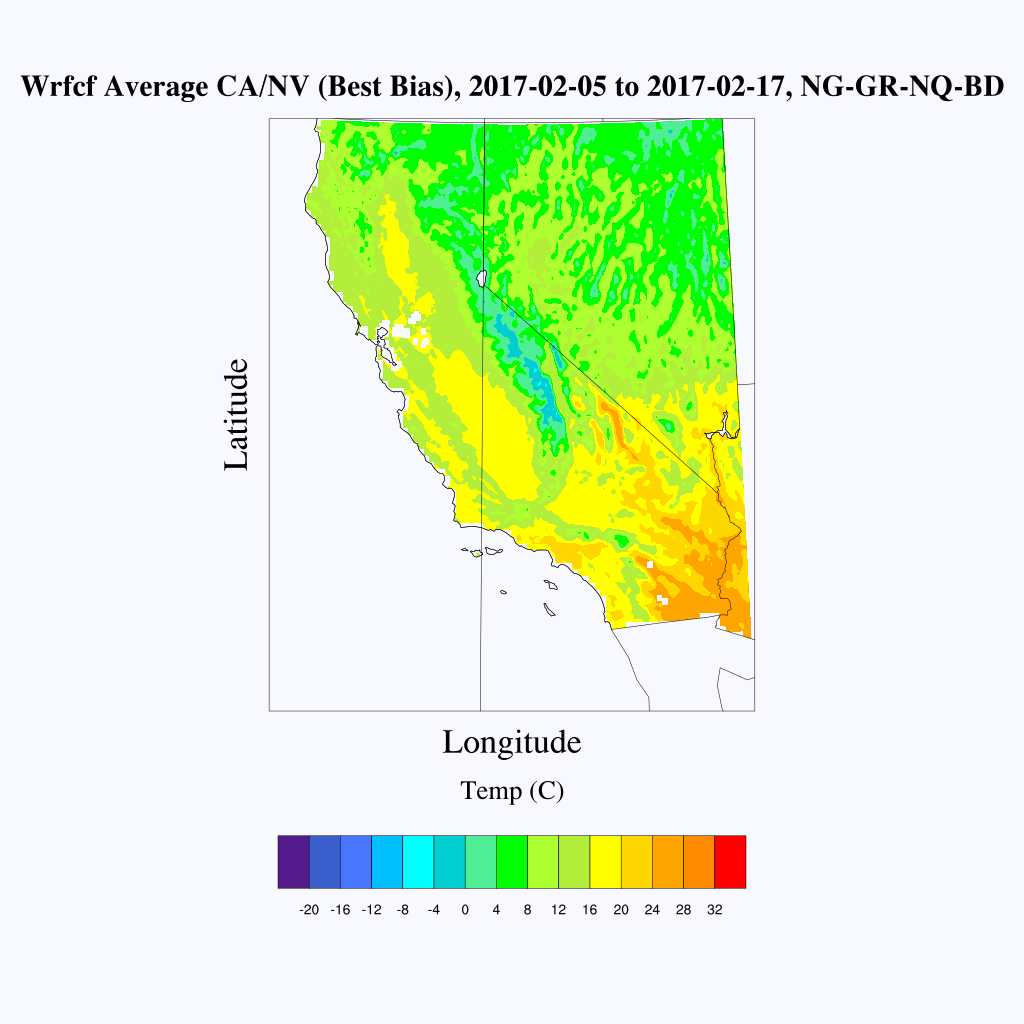

In [15]:
# display plot (needs further cleaning later)
display.Image("./wrfcf17_avg_ca_nv_bestbias_NG-GR-NQ-BD.png")

fin.